<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Load and Prepare Data

In [2]:
df=pd.read_csv('../input/churn1/Churn.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### To see the number of null values in each columns 

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


#### Delete some columns to make Dataframe easier to see

In [6]:
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [10]:
df.NumOfProducts.unique()

array([1, 3, 2, 4])

# Visualization

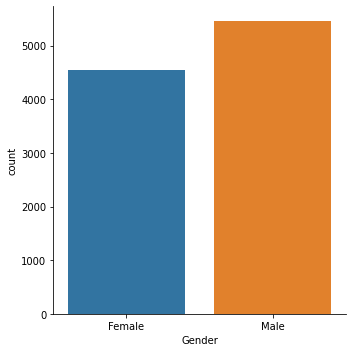

In [11]:
sns.catplot(x="Gender", kind="count", data=df);

In [12]:
df.Gender.value_counts(normalize=True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

#### More than 54% of customers are men

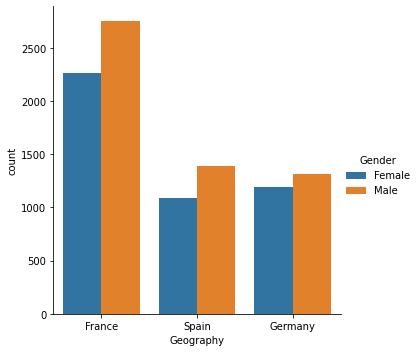

In [13]:
sns.catplot(x="Geography", kind="count", data=df ,hue='Gender');

In [14]:
df.groupby('Geography').Gender.value_counts(normalize=True)*100

Geography  Gender
France     Male      54.906262
           Female    45.093738
Germany    Male      52.451176
           Female    47.548824
Spain      Male      56.035527
           Female    43.964473
Name: Gender, dtype: float64

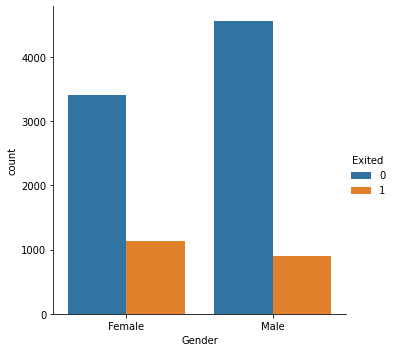

In [15]:
sns.catplot(x="Gender", kind="count", data=df ,hue='Exited');

In [16]:
df.groupby('Gender').Exited.value_counts(normalize=True)*100

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

In [17]:
df.groupby('Gender').Exited.value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

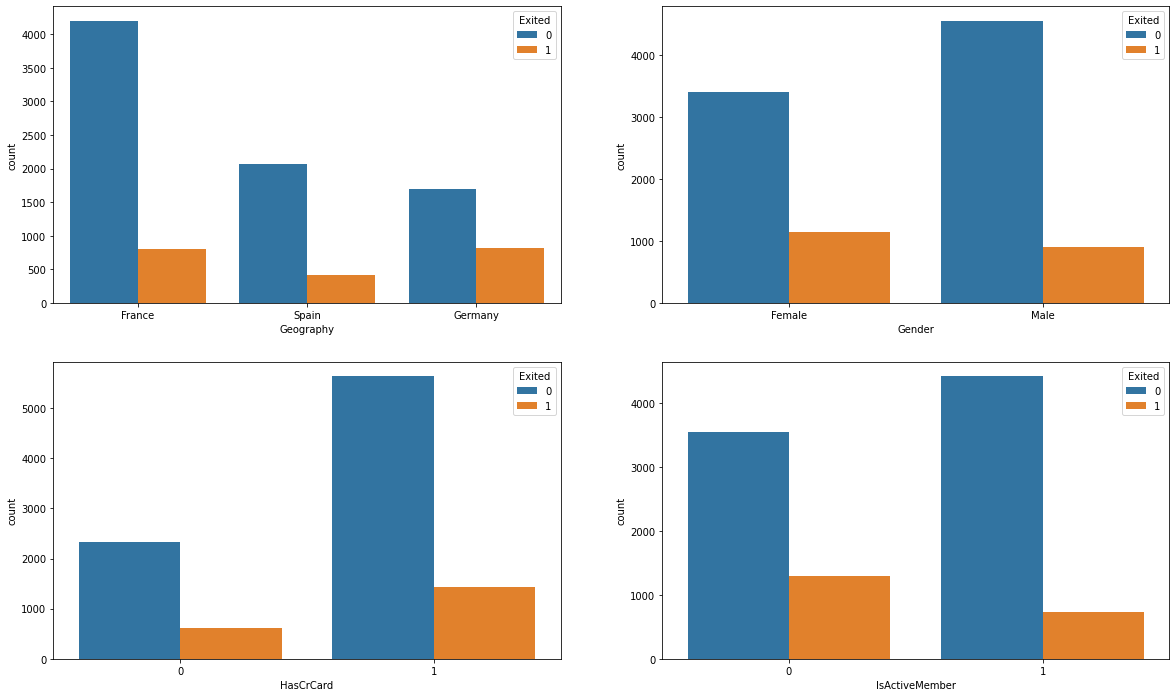

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

In [19]:

df.groupby('Geography').Exited.value_counts(normalize=True)*100

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

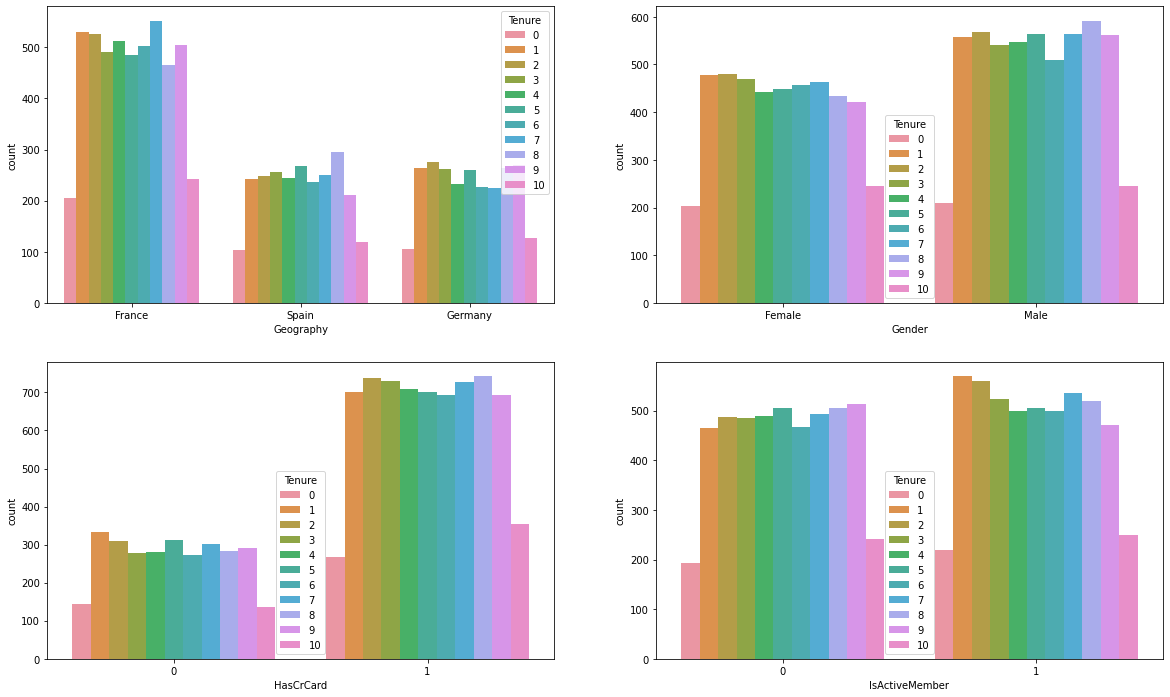

In [20]:
#sns.catplot(x="Gender", kind="count", data=df ,hue='Tenure');
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Tenure',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Tenure',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Tenure',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Tenure',data = df, ax=axarr[1][1]);

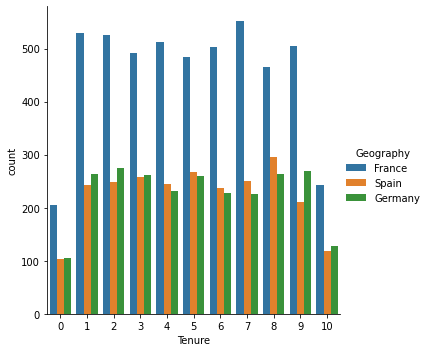

In [21]:
sns.catplot(x="Tenure", kind="count", data=df ,hue='Geography');

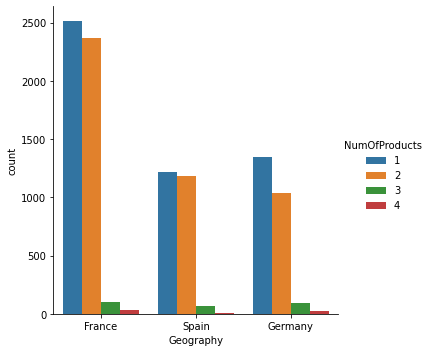

In [22]:
sns.catplot(x="Geography", kind="count", data=df ,hue='NumOfProducts');

In [23]:
df.groupby('Geography').NumOfProducts.value_counts(normalize=True)*100

Geography  NumOfProducts
France     1                50.139609
           2                47.207818
           3                 2.074192
           4                 0.578381
Germany    1                53.766441
           2                41.450777
           3                 3.826226
           4                 0.956556
Spain      1                49.293500
           2                47.759386
           3                 2.664514
           4                 0.282600
Name: NumOfProducts, dtype: float64

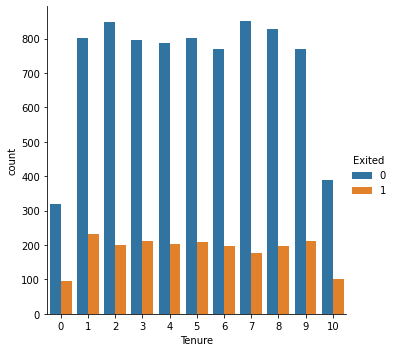

In [24]:
sns.catplot(x="Tenure", kind="count", data=df ,hue='Exited');

In [25]:
df.groupby('Tenure').Exited.value_counts(normalize=True)*100

Tenure  Exited
0       0         76.997579
        1         23.002421
1       0         77.584541
        1         22.415459
2       0         80.820611
        1         19.179389
3       0         78.889990
        1         21.110010
4       0         79.474216
        1         20.525784
5       0         79.347826
        1         20.652174
6       0         79.731127
        1         20.268873
7       0         82.782101
        1         17.217899
8       0         80.780488
        1         19.219512
9       0         78.353659
        1         21.646341
10      0         79.387755
        1         20.612245
Name: Exited, dtype: float64

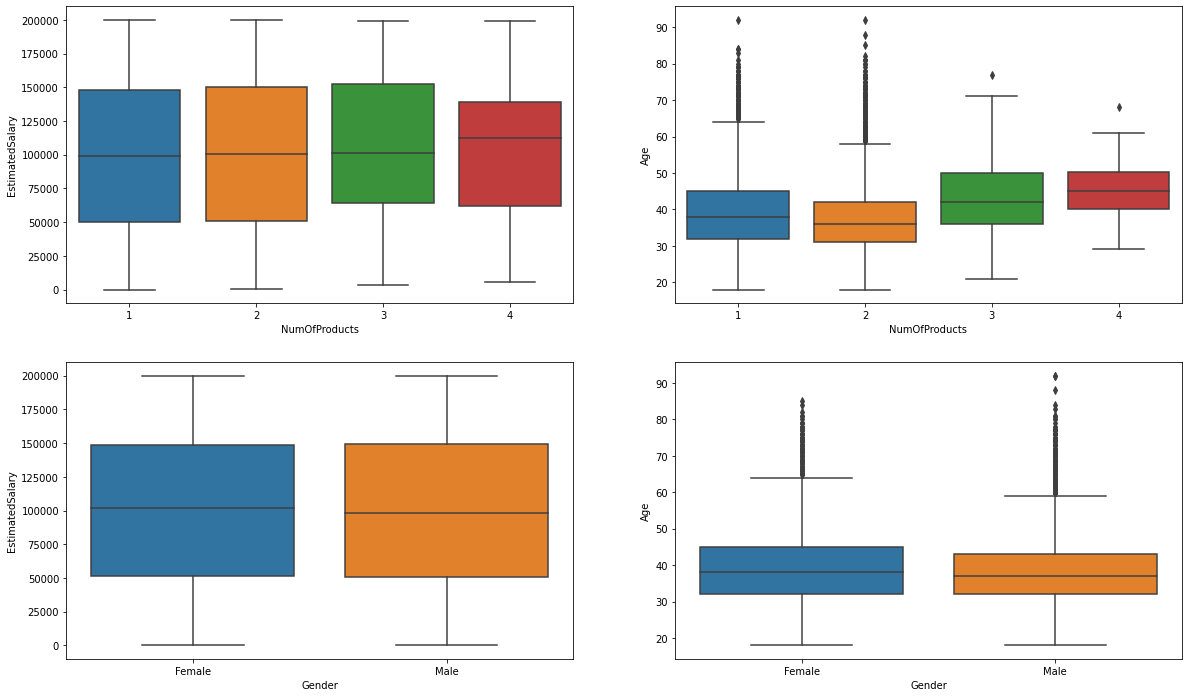

In [26]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(x = 'NumOfProducts',y='EstimatedSalary',data = df, ax=axarr[0][0])
sns.boxplot(x = 'NumOfProducts', y='Age',data = df, ax=axarr[0][1])
sns.boxplot(x="Gender", y="EstimatedSalary",data = df, ax=axarr[1][0])
sns.boxplot(x="Gender", y="Age",data = df, ax=axarr[1][1]);

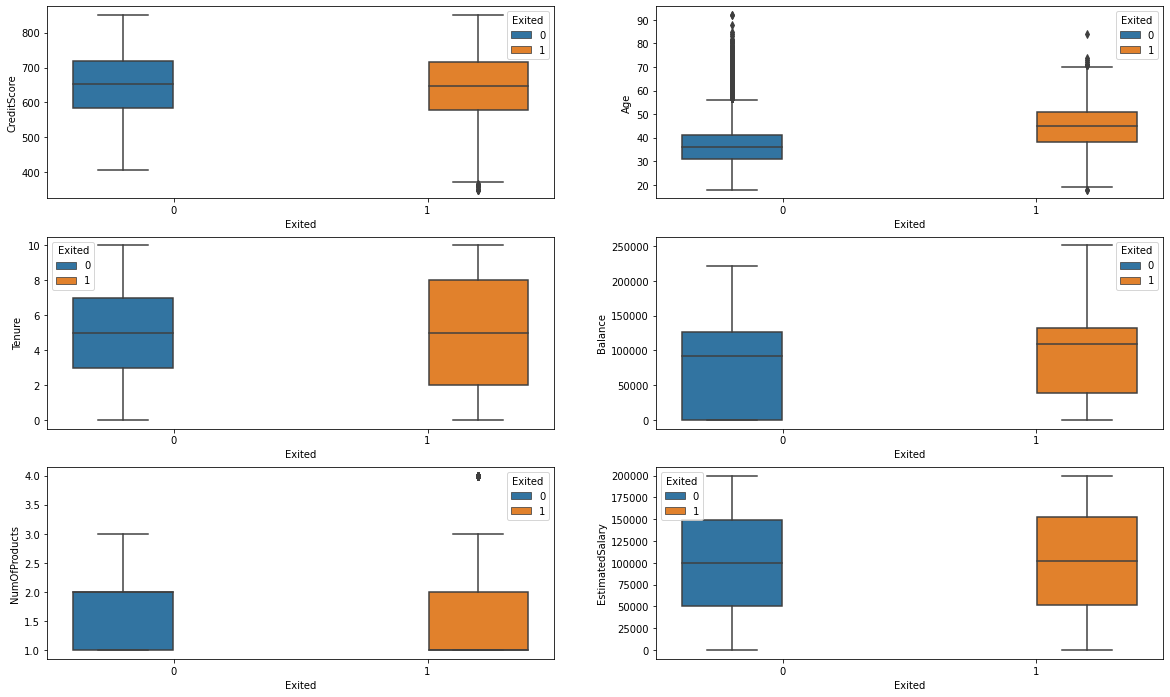

In [27]:
 fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1]);

## Prepare Data for Machine learning

In [28]:
Genders=pd.get_dummies(df['Gender'])
df = pd.concat([df,Genders],axis=1)

In [29]:
Geographys=pd.get_dummies(df['Geography'])
df = pd.concat([df,Geographys],axis=1)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [30]:
df.drop(['Gender', 'Geography','CustomerId'], axis=1, inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


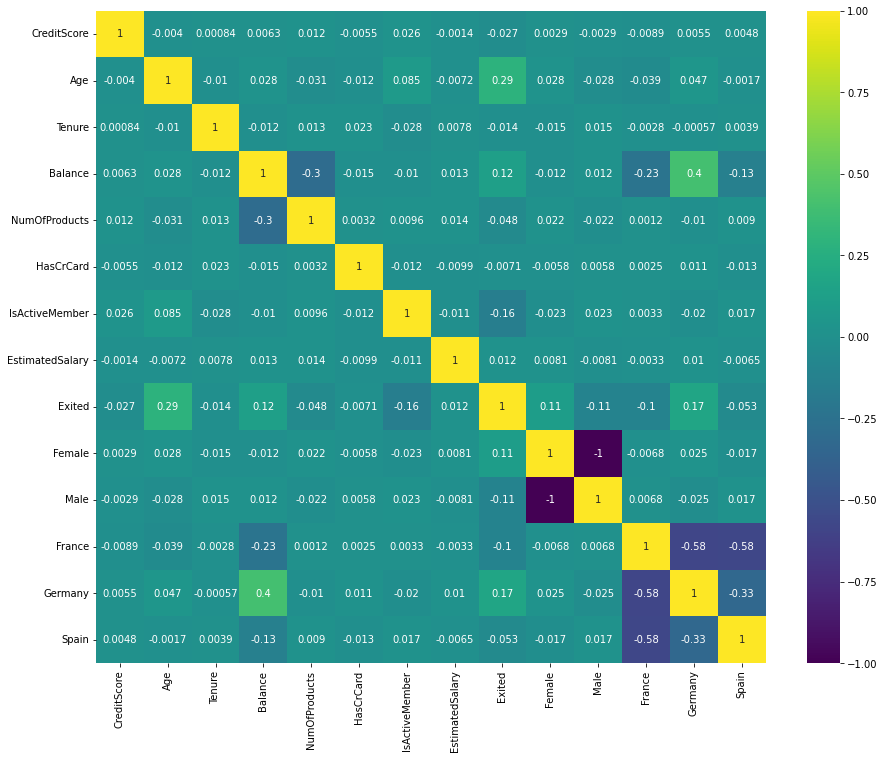

In [31]:
corr = df.corr()
plt.figure(figsize=(15,12)) 
sns.heatmap(corr, cmap='viridis', annot=True);

In [32]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy

In [33]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 13)
(8000,)
(2000, 13)
(2000,)


# Models

## logistic Regression

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = logreg.predict(X_test)

In [36]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))


The accuracy of Logistic Regression is:  0.791


In [37]:
pd.crosstab(logreg.predict(X),y)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1595
           1       0.36      0.04      0.08       405

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.71      0.79      0.72      2000



## KNN

In [38]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1) 
print("Accuracy of the DecisionTree Model: ",accuracy)

In [ ]:
print(classification_report(y_test, y_pred1))

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred2 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy = accuracy_score(y_test, y_pred2) 
print("Accuracy of the DecisionTree Model: ",accuracy)

In [ ]:
print(classification_report(y_test, y_pred1))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150 ,criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred_test = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, rfc_pred_test) 
print("Accuracy of the RandomForest Model: ",accuracy)

In [ ]:
print(classification_report(y_test,rfc_pred_test))

## XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred4 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4) 
print("Accuracy of the XGBoosy Model: ",accuracy)

In [ ]:
print(classification_report(y_test,y_pred4))

## SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy = accuracy_score(y_test, y_pred5) 
print("Accuracy of the SVM Model: ",accuracy)

In [ ]:
print(classification_report(y_test,y_pred4))

# ROC Curves

In [ ]:
from sklearn.metrics import roc_curve , auc

In [ ]:
logistic_fpr,logistic_tpr,threshold = roc_curve(y_test,y_pred)
auc_logistic = auc(logistic_fpr ,logistic_tpr)
dt_fpr,dt_tpr,threshold_dt = roc_curve(y_test,y_pred2)
auc_dt = auc(dt_fpr ,dt_tpr)
rfc_fpr,rfc_tpr,threshold_rfc = roc_curve(y_test,rfc_pred_test)
auc_rfc = auc(rfc_fpr ,rfc_tpr)
XG_fpr,XG_tpr,threshold_XG = roc_curve(y_test,y_pred4)
auc_XG = auc(XG_fpr ,XG_tpr)
svm_fpr,svm_tpr,threshold_svm = roc_curve(y_test,y_pred5)
auc_svm = auc(svm_fpr ,svm_tpr)
knn_fpr,knn_tpr,threshold_knn = roc_curve(y_test,y_pred1)
auc_knn = auc(knn_fpr ,knn_tpr)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(logistic_fpr ,logistic_tpr,label='logistic')
ax.plot(dt_fpr ,dt_tpr,label='DT')
ax.plot(rfc_fpr ,rfc_tpr ,label='RFC')
ax.plot(XG_fpr ,XG_tpr ,label='XGBoost')
ax.plot(svm_fpr ,svm_tpr ,label='SVM')
ax.plot(knn_fpr ,knn_tpr ,label='KNN')
plt.legend();

# MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train.iloc[:,[0,1,7]] = sc.fit_transform(X_train.iloc[:,[0,1,7]])
X_test.iloc[:,[0,1,7]] = sc.transform(X_test.iloc[:,[0,1,7]])


## XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred4_2 = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred4_2) 
print("Accuracy of the XGBoost_2 Model: ",accuracy)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150 ,criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)
rfc_pred_test_2 = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, rfc_pred_test_2) 
print("Accuracy of the RandomForest_2 Model: ",accuracy)

### Our best models were invarient !

# Balanced

In [ ]:
ax = sns.catplot(x="Exited", kind="count", data=df);

#### our dataset is imbalanced !

## Under_resampeling

In [ ]:
count_class_0, count_class_1 = df.Exited.value_counts()
df_class_0 = df[df['Exited'] == 0]

df_class_1 = df[df['Exited'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

df_test_under.Exited.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
X = df_test_under.drop(['Exited'], axis=1)
y = df_test_under['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred4_3 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4_3) 
print("Accuracy of the XGBoosy Model: ",accuracy)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150 ,criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred_test_3 = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, rfc_pred_test_3) 
print("Accuracy of the RandomForest Model: ",accuracy)

In [ ]:
print(classification_report(y_test,rfc_pred_test_3))

#### Under resampling is not usefule for our models.

# Over_resampeling

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

df_test_over.Exited.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
X = df_test_over.drop(['Exited'], axis=1)
y = df_test_over['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred4_4 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4_4) 
print("Accuracy of the XGBoosy Model: ",accuracy)

In [ ]:
print(classification_report(y_test,y_pred4_4))

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150 ,criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred_test_4 = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, rfc_pred_test_4) 
print("Accuracy of the RandomForest Model: ",accuracy)

In [ ]:
print(classification_report(y_test,rfc_pred_test_4))

#### Oversampeling made our models better!

# ROC Curves

In [ ]:
from sklearn.metrics import roc_curve , auc
rfc_fpr,rfc_tpr,threshold_rfc = roc_curve(y_test,rfc_pred_test_4)
auc_rfc = auc(rfc_fpr ,rfc_tpr)
XG_fpr,XG_tpr,threshold_XG = roc_curve(y_test,y_pred4_4)
auc_XG = auc(XG_fpr ,XG_tpr)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(rfc_fpr ,rfc_tpr ,label='RFC')
ax.plot(XG_fpr ,XG_tpr ,label='XGBoost')
plt.legend();

#### at end : for this dataset " Balanced model od RandmForest " is the best model !!
